## Import libraries/modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check for missing values and duplicates

In [5]:
df.isna().sum() #checking for missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum() #checking for duplicates

np.int64(0)

#### Explore data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [5]:
## Categories in race_ethnicity column
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [10]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [6]:
# Categories in parental level of education column
df['parental_level_of_education'].unique()  

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [7]:
# categories in lunch column
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [8]:
# categories in test preparation course column
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [9]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [3]:
## Numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
print('Numerical Features:', numerical_features)
print('\nCategorical Features:', categorical_features)    

Numerical Features: ['math_score', 'reading_score', 'writing_score']

Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 'total_score' and 'avg_score' column addition 

In [4]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score'] / 3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [5]:
math_full = df[df['math_score'] == 100]['avg_score'].count()
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()

print('Number of students who scored full marks in math:', math_full)
print('Number of students who scored full marks in reading:', reading_full)
print('Number of students who scored full marks in writing:', writing_full)

Number of students who scored full marks in math: 7
Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14


#### Data Visualizations

##### Histograms and KDE

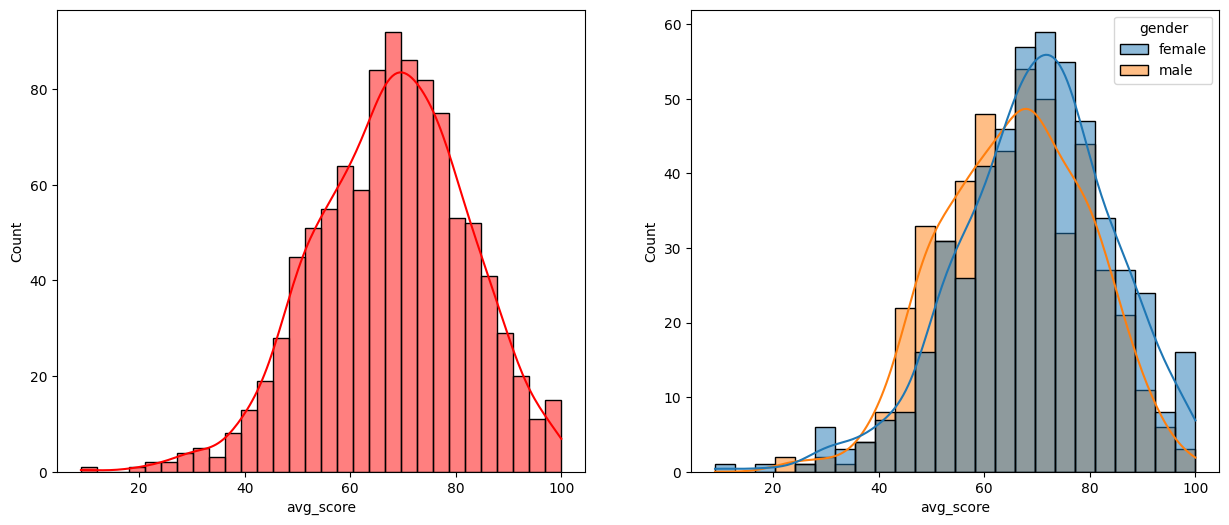

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='red')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='avg_score', kde=True, hue='gender')
plt.show()

<Axes: xlabel='avg_score', ylabel='Count'>

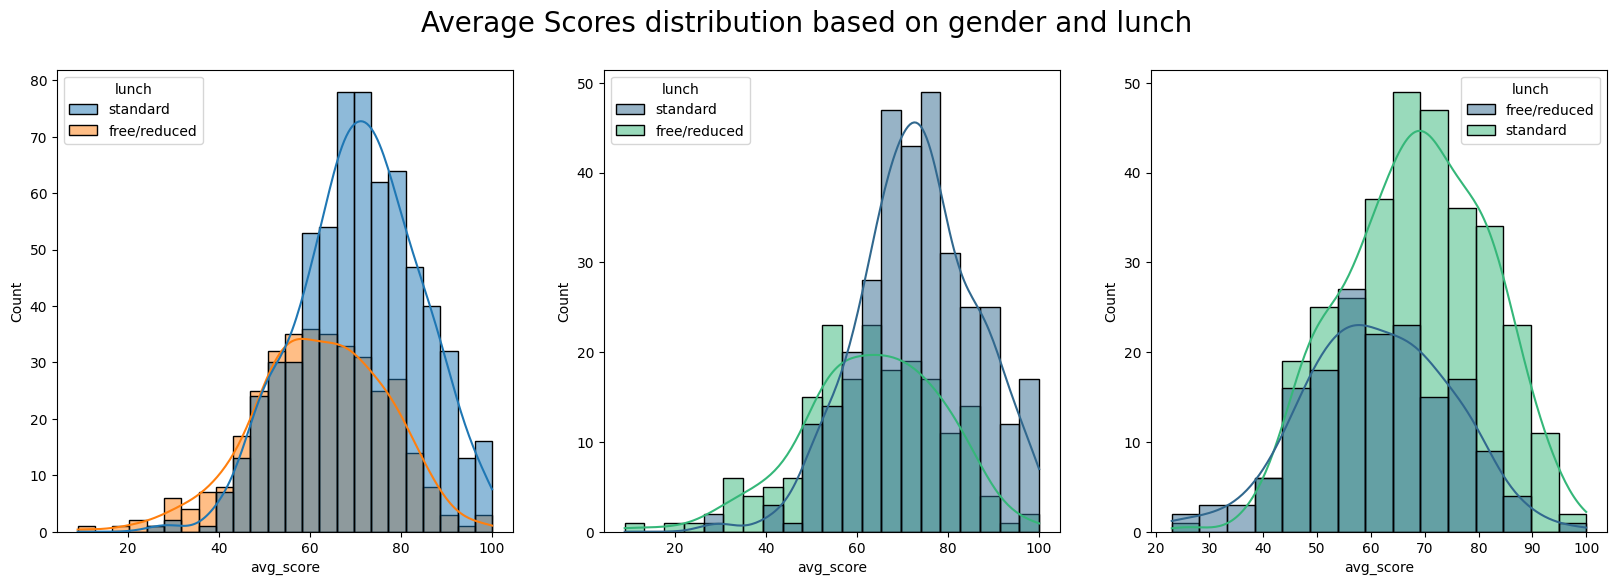

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Average Scores distribution based on gender and lunch', fontsize=20)

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='avg_score', kde=True, hue='lunch')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='avg_score', kde=True, hue='luch', palette='viridis')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='avg_score', kde=True, hue='lunch', palette='rocket')

<Axes: xlabel='avg_score', ylabel='Count'>

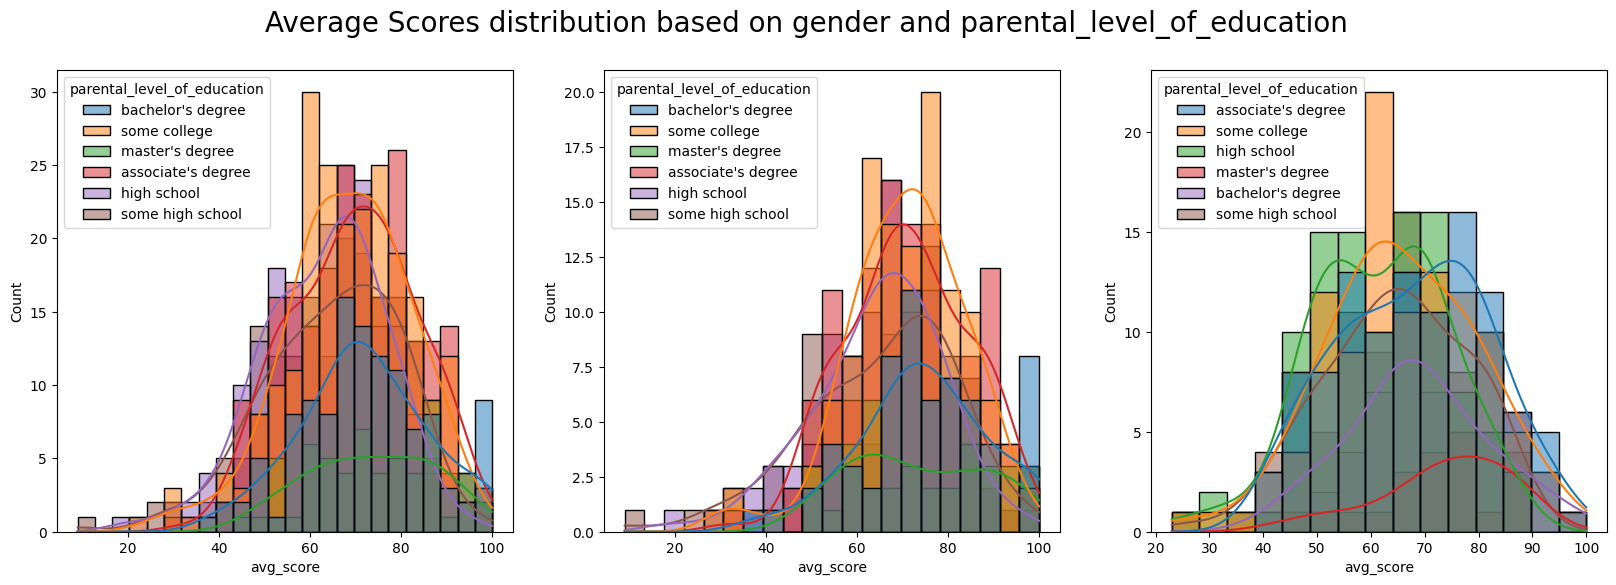

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Average Scores distribution based on gender and parental_level_of_education', fontsize=20)

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='avg_score', kde=True, hue='parental_level_of_education')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='avg_score', kde=True, hue='parental_level_of_education')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='avg_score', kde=True, hue='parental_level_of_education')

<Axes: xlabel='avg_score', ylabel='Count'>

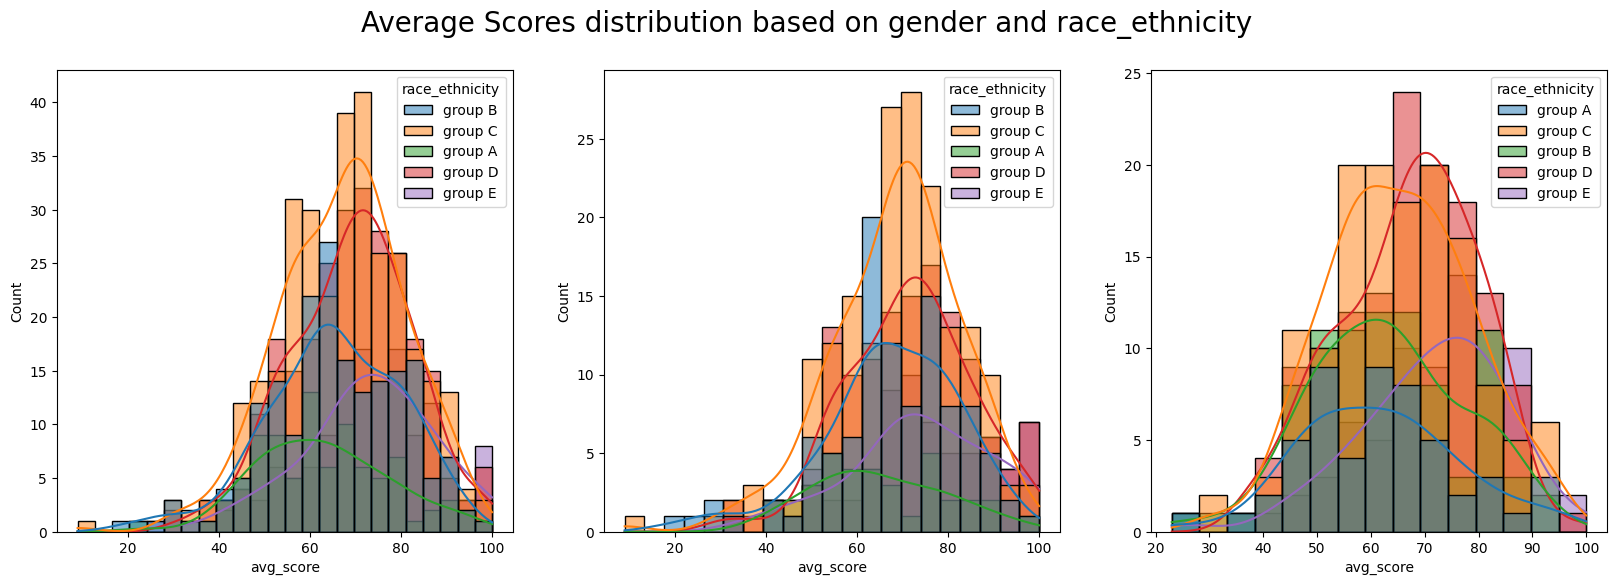

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Average Scores distribution based on gender and race_ethnicity', fontsize=20)

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='avg_score', kde=True, hue='race_ethnicity')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='avg_score', kde=True, hue='race_ethnicity')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='avg_score', kde=True, hue='race_ethnicity')

##### Score range in all three subjects

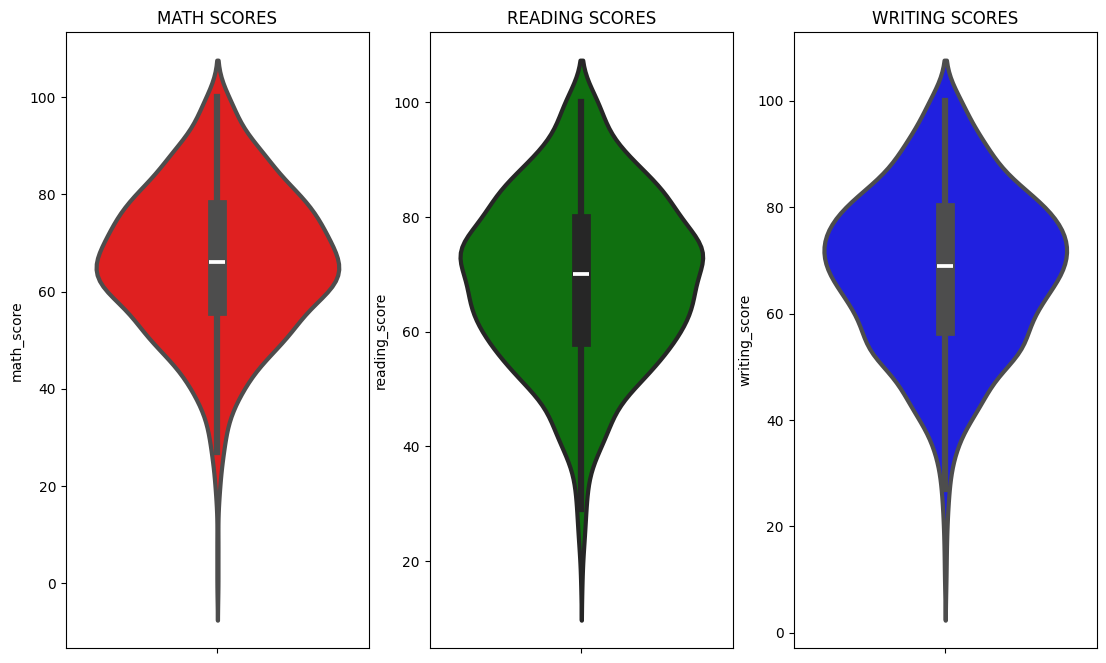

In [37]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
               
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

##### Multivariate analysis using pieplot

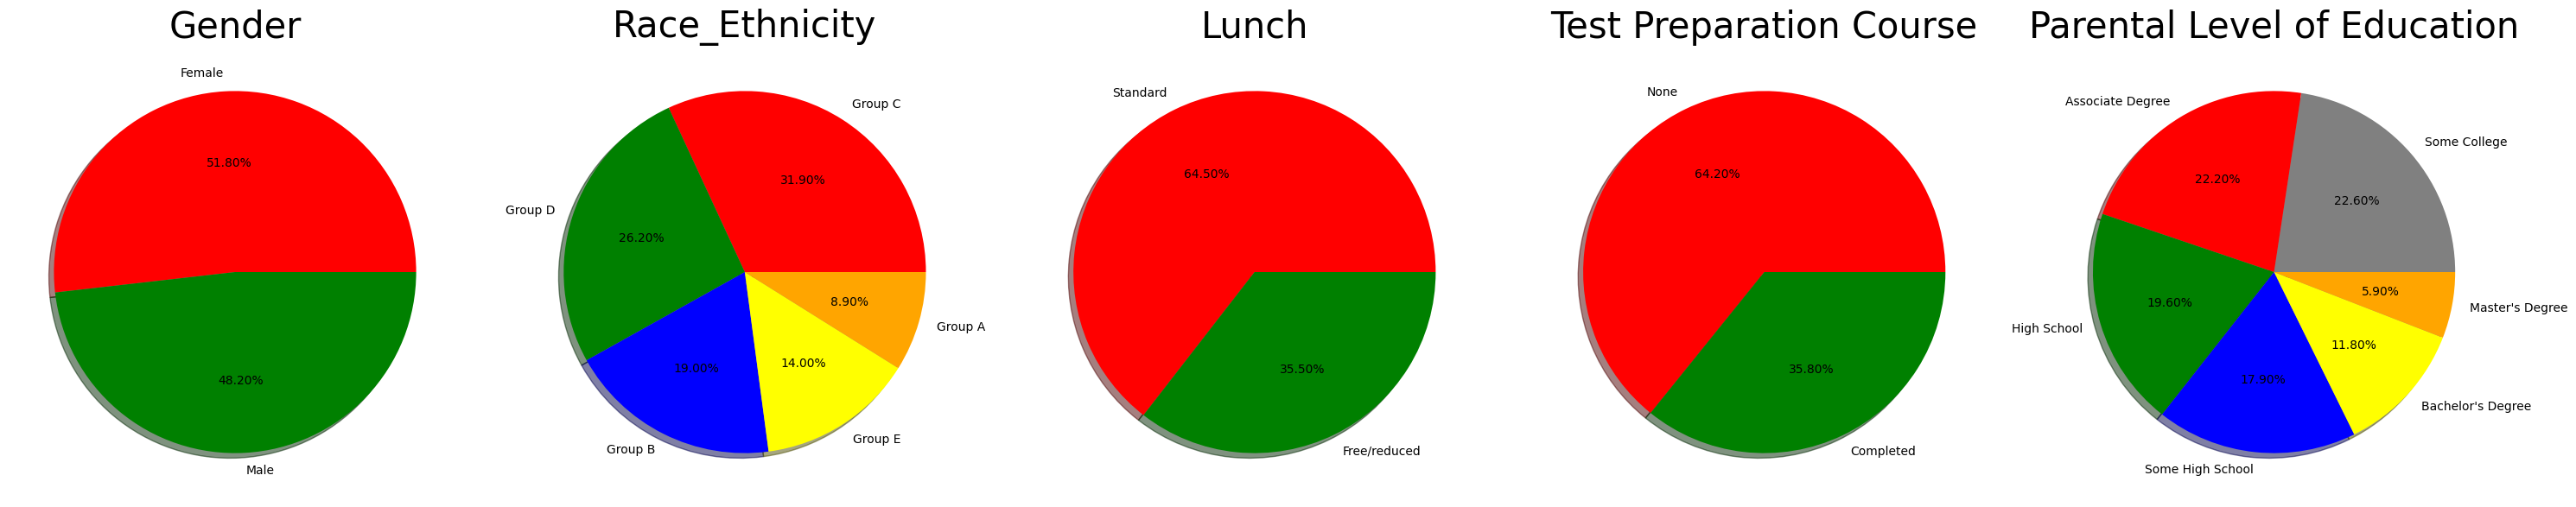

In [12]:
plt.rcParams['figure.figsize'] =  (30, 15)

# Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
colors = ['red', 'green']
labels = 'Female', 'Male'

plt.pie(size, colors = colors, labels = labels, autopct='%.2f%%', shadow=True)
plt.title('Gender', fontsize = 30)
plt.axis('off')

# Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
colors = ['red', 'green', 'blue', 'yellow', 'orange']
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True)
plt.title('Race_Ethnicity', fontsize=30)
plt.axis('off')

# Lunch
plt.subplot(1, 5, 3)
size = df.lunch.value_counts()
colors = ['red', 'green']
labels = 'Standard', 'Free/reduced'

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True)
plt.title('Lunch', fontsize=30)
plt.axis('off')

# Test Preparation Course
plt.subplot(1, 5, 4)
size = df.test_preparation_course.value_counts()
colors = ['red', 'green']
labels = 'None', 'Completed'

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True)
plt.title('Test Preparation Course', fontsize=30)
plt.axis('off')

# Parental Level of Education
plt.subplot(1, 5, 5)
size = df.parental_level_of_education.value_counts()
colors = ['gray', 'red', 'green', 'blue', 'yellow', 'orange']
labels = 'Some College', 'Associate Degree', 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True)
plt.title('Parental Level of Education', fontsize=30)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

**Insights:**

*   Number of Male and Female students is almost equal
*   Number students are greatest in Group C
*   Number of students who have standard lunch are greater
*   Number of students who have not enrolled in any test preparation course is greater
*   Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 'gender' column

##### Univariate Analysis

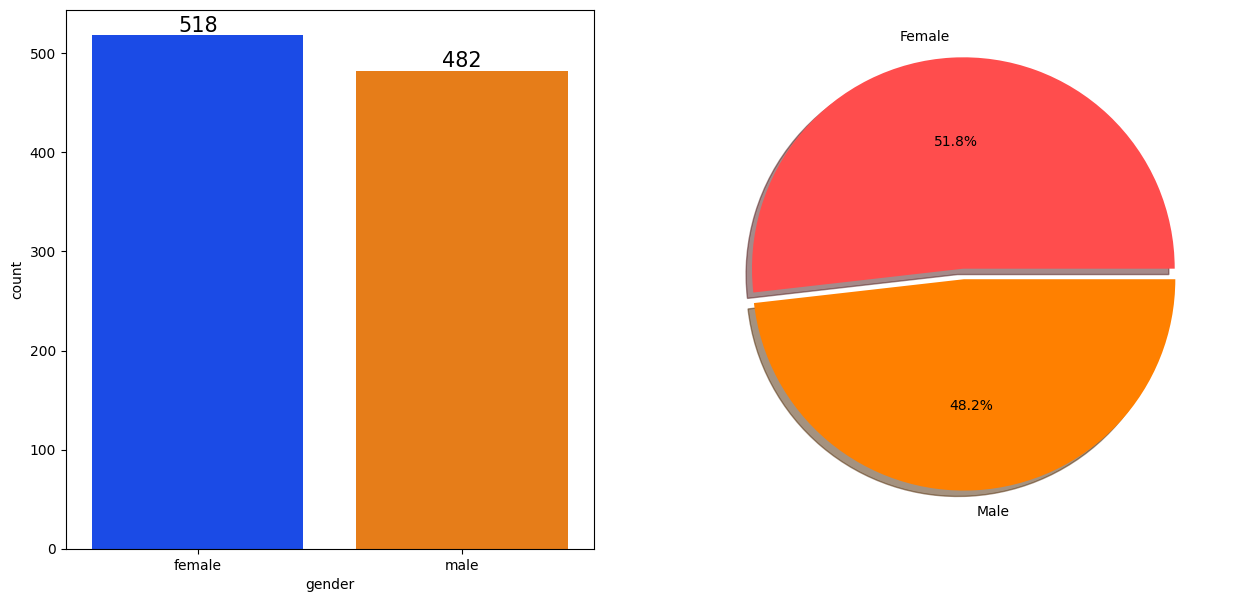

In [7]:
# GENDER
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(data=df, x=df['gender'], palette='bright', ax=axs[0], saturation=0.80)

for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)

plt.pie(x=df['gender'].value_counts(), colors=['#ff4d4d', '#ff8000'], labels=['Female', 'Male'], explode=[0.05, 0], 
        autopct='%1.1f%%', shadow=True)
plt.show()

##### Bivariate Analysis

Has 'Gender' any impact on student's performance?

In [12]:
# gender_group = df.groupby('gender').mean()
# gender_group

#### 'Race_Ethnicity' column

##### Univariate Analysis

How's Group wise distribution?

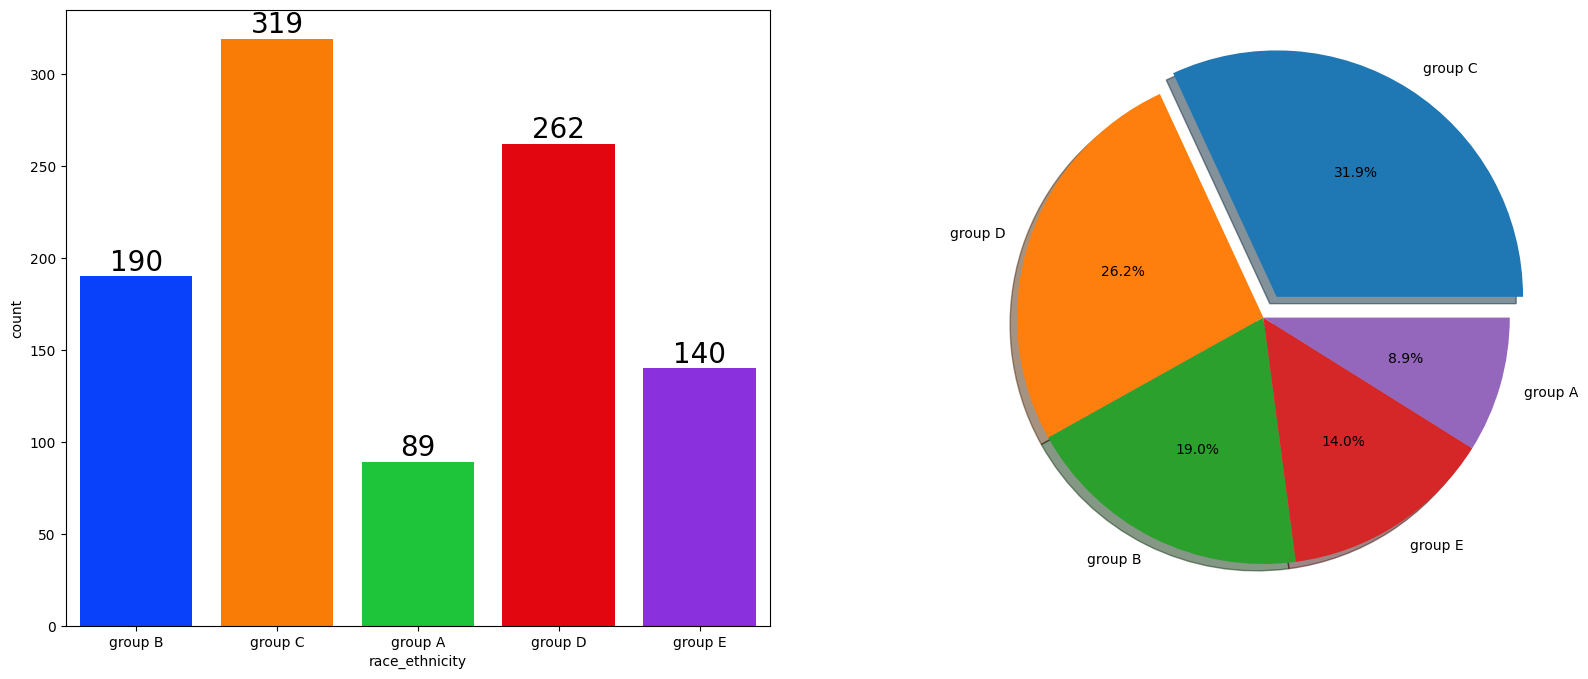

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(data=df, x=df['race_ethnicity'], palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Insights:**
*   Most of the student belonging from group C /group D.
*   Lowest number of students belong to groupA.

##### Bivariate Analysis

Has Race/Ehnicity any impact on student's performance ?

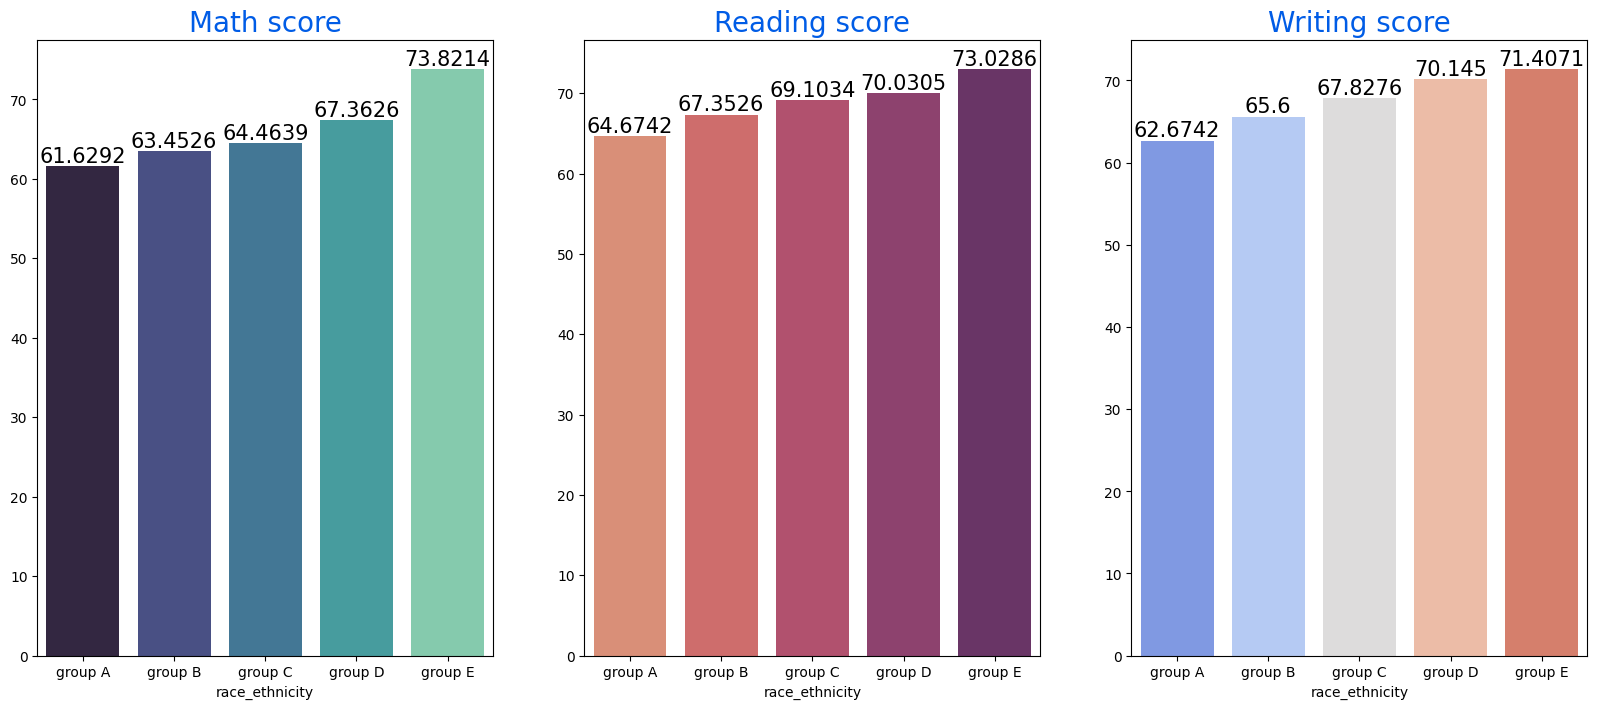

In [15]:
group_data2 = df.groupby('race_ethnicity')
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=group_data2['math_score'].mean().index, y=group_data2['math_score'].mean().values, ax=ax[0], palette='mako')
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data2['reading_score'].mean().index, y=group_data2['reading_score'].mean().values, ax=ax[1], palette='flare')
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data2['writing_score'].mean().index, y=group_data2['writing_score'].mean().values, ax=ax[2], palette='coolwarm')
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights:**

*   Group E students have scored the highest marks in all subjects.
*   Group A students have scored the lowest marks in all subjects.
*   Students from a lower Socioeconomic status have a lower avg in all course subjects

#### Parental level of education

##### Univariate Analysis

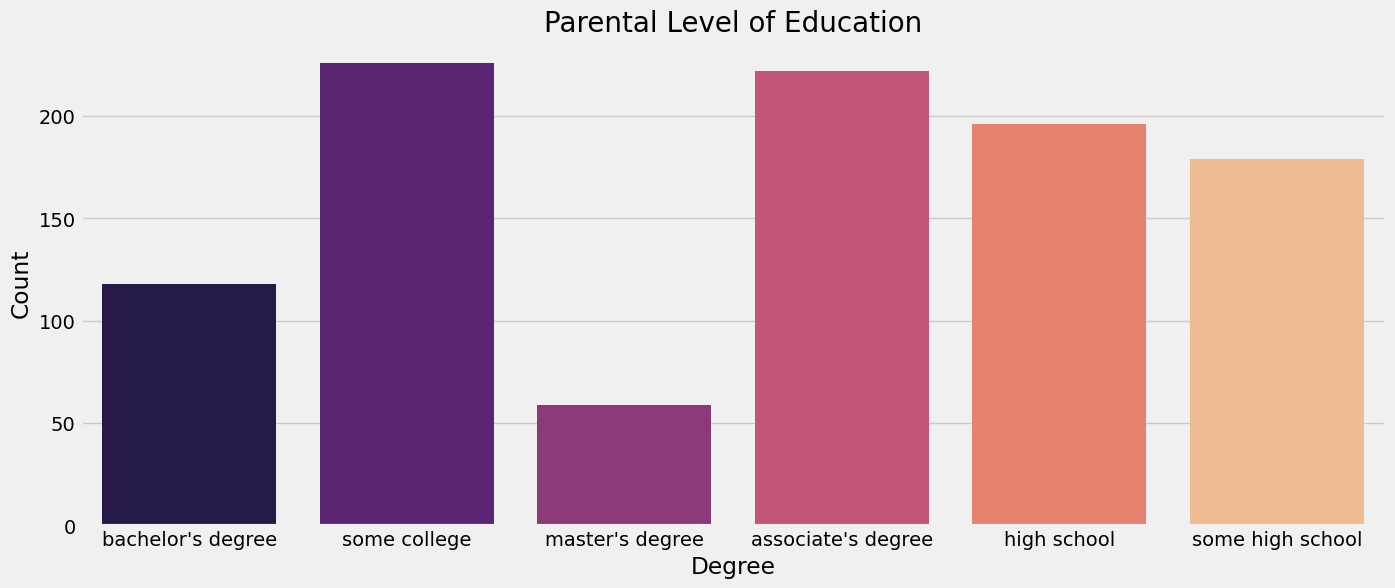

In [19]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')
sns.countplot(data = df, x = 'parental_level_of_education', palette = 'magma')
plt.title('Parental Level of Education', fontweight=25, fontsize = 20)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

##### Bivariate Analysis

Any impact on student performance?

In [22]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10, 10), colormap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

#### 'Lunch' column

Which type of lunch is most common amoung students ?
What is the effect of lunch type on test results?

##### Univariate Analysis ( Which type of lunch is most common amoung students ? )

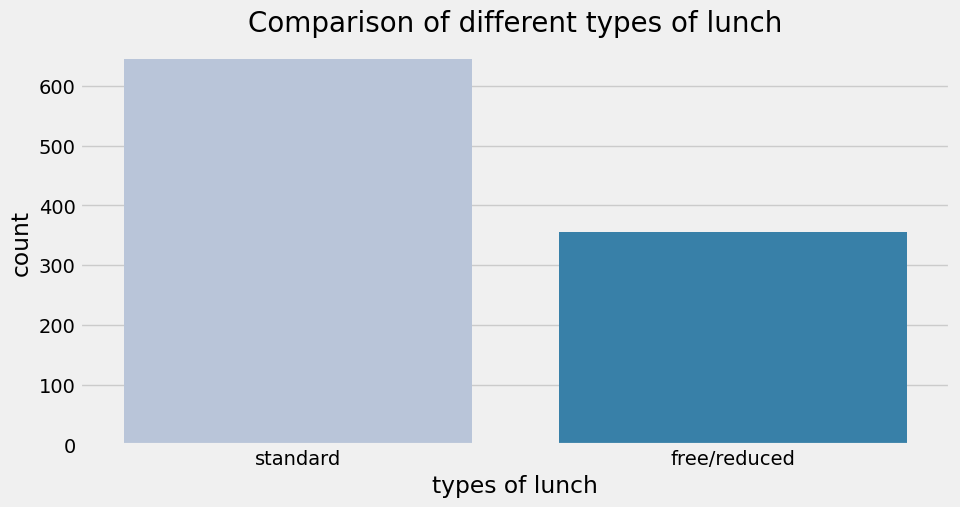

In [27]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')  
sns.countplot(data = df, x = 'lunch', palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 25, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

*   Students being served 'Standard' lunch was more than free lunch

##### Bivariate Analysis

Has lunch type any impact on performance?

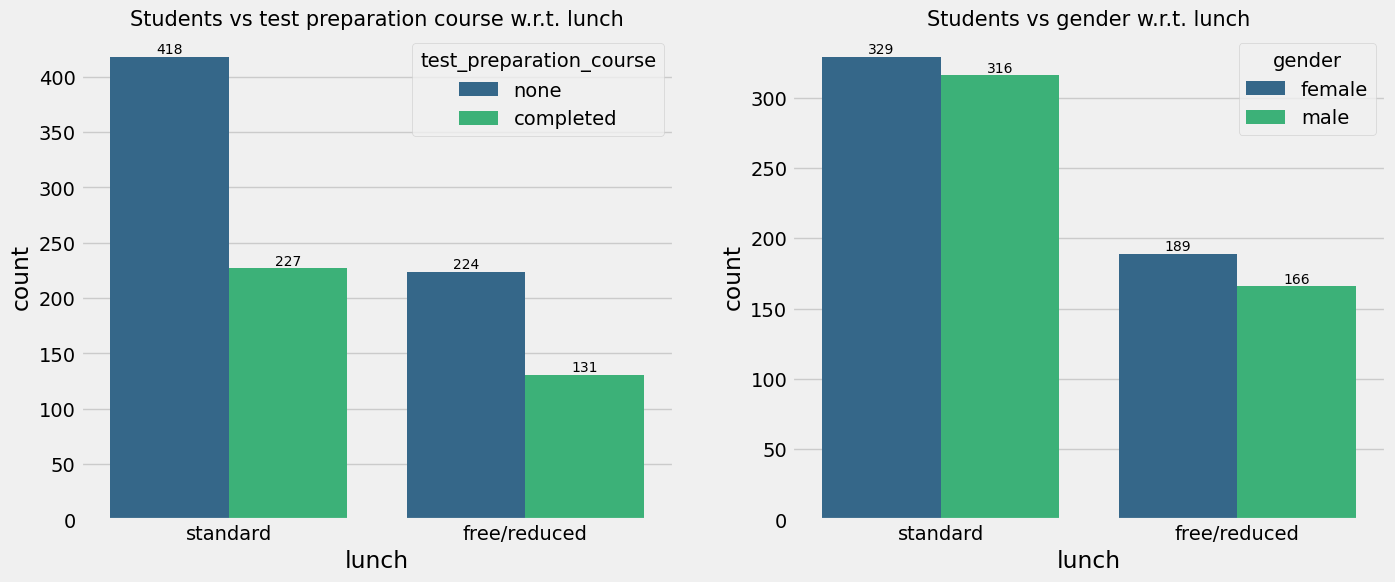

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(data=df, x='lunch', hue='test_preparation_course', palette='viridis', saturation=0.90, ax=ax[0])
ax[0].set_title('Students vs test preparation course w.r.t. lunch',color='black',size=15)

for ax[0].containers in ax[0].containers:
    ax[0].bar_label(ax[0].containers, color='black', size=10)
    
sns.countplot(data=df, x='lunch', palette = 'viridis', hue='gender', saturation=0.90, ax=ax[1])
ax[1].set_title('Students vs gender w.r.t. lunch',color='black',size=15)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)       

**Insights:**
*   Students who get Standard Lunch tend to perform better (in terms of test preparation course) than students who got free/reduced lunch
*   Female students are larger in number (by a small margin) in both categories of 'lunch'


#### 'test_preparation_course' column

##### Bivariate Analysis ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

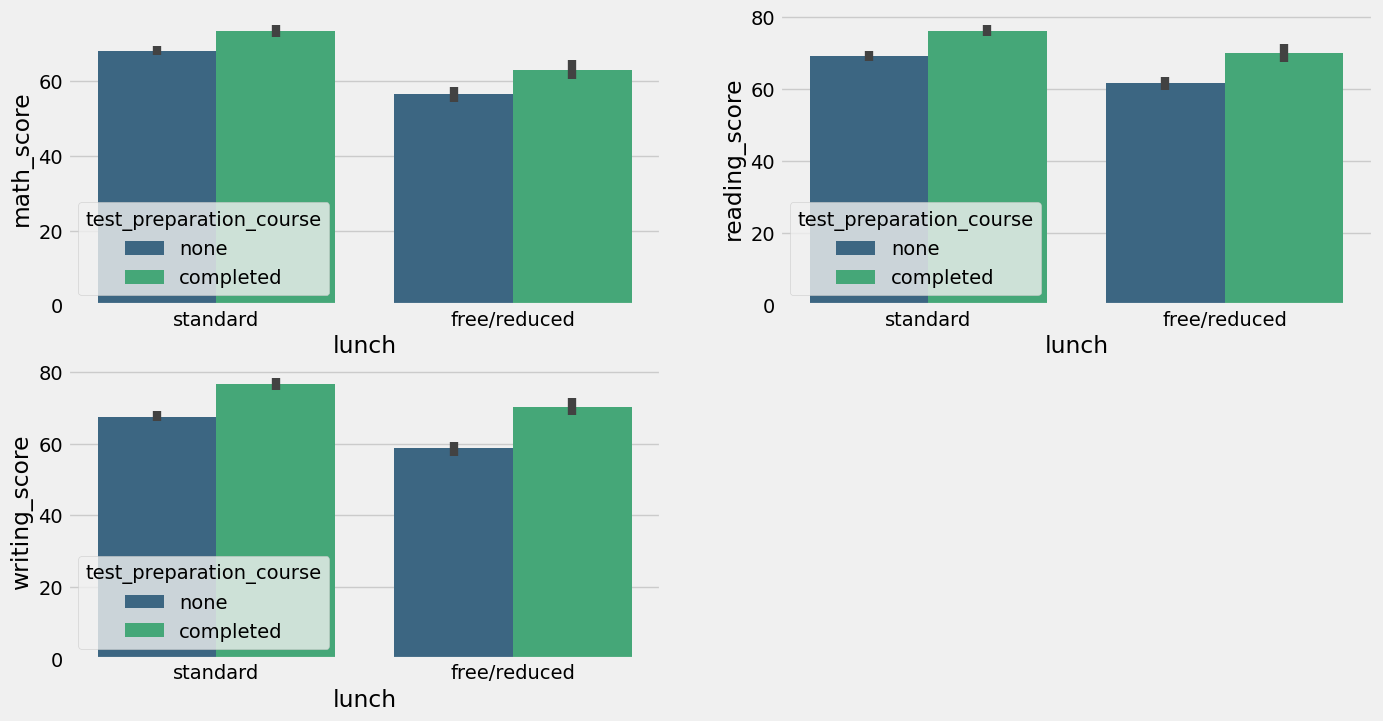

In [34]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='lunch', y='math_score', hue='test_preparation_course', palette='viridis')
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='lunch', y='reading_score', hue='test_preparation_course', palette='viridis')
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='lunch', y='writing_score', hue='test_preparation_course', palette='viridis')

**Insights:**
*   Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

#### Checking Outliers

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


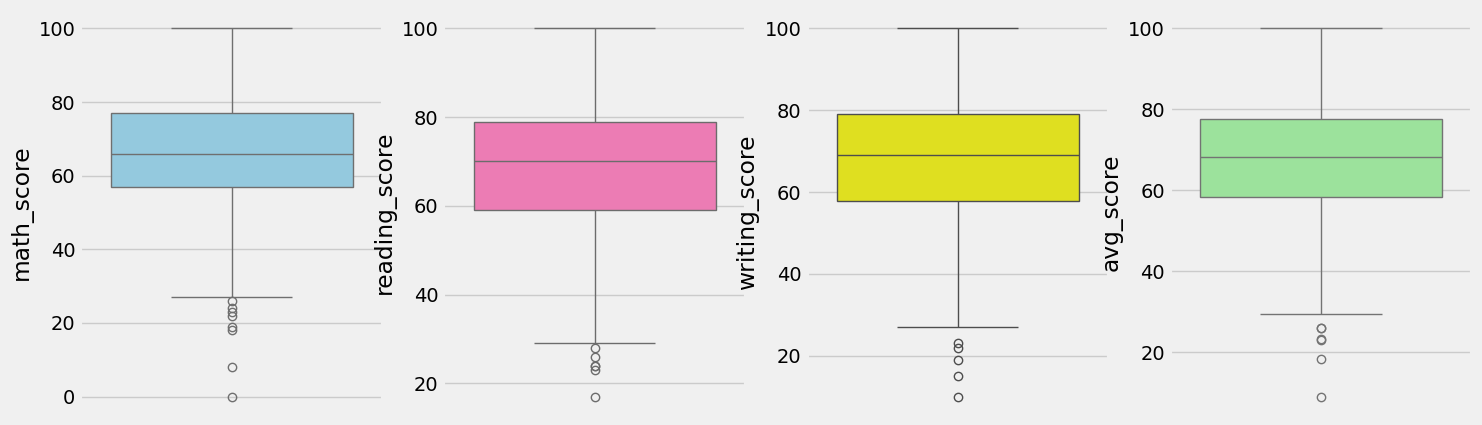

In [37]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

In [38]:
df['math_score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

#### Multivariate analysis using pairplot

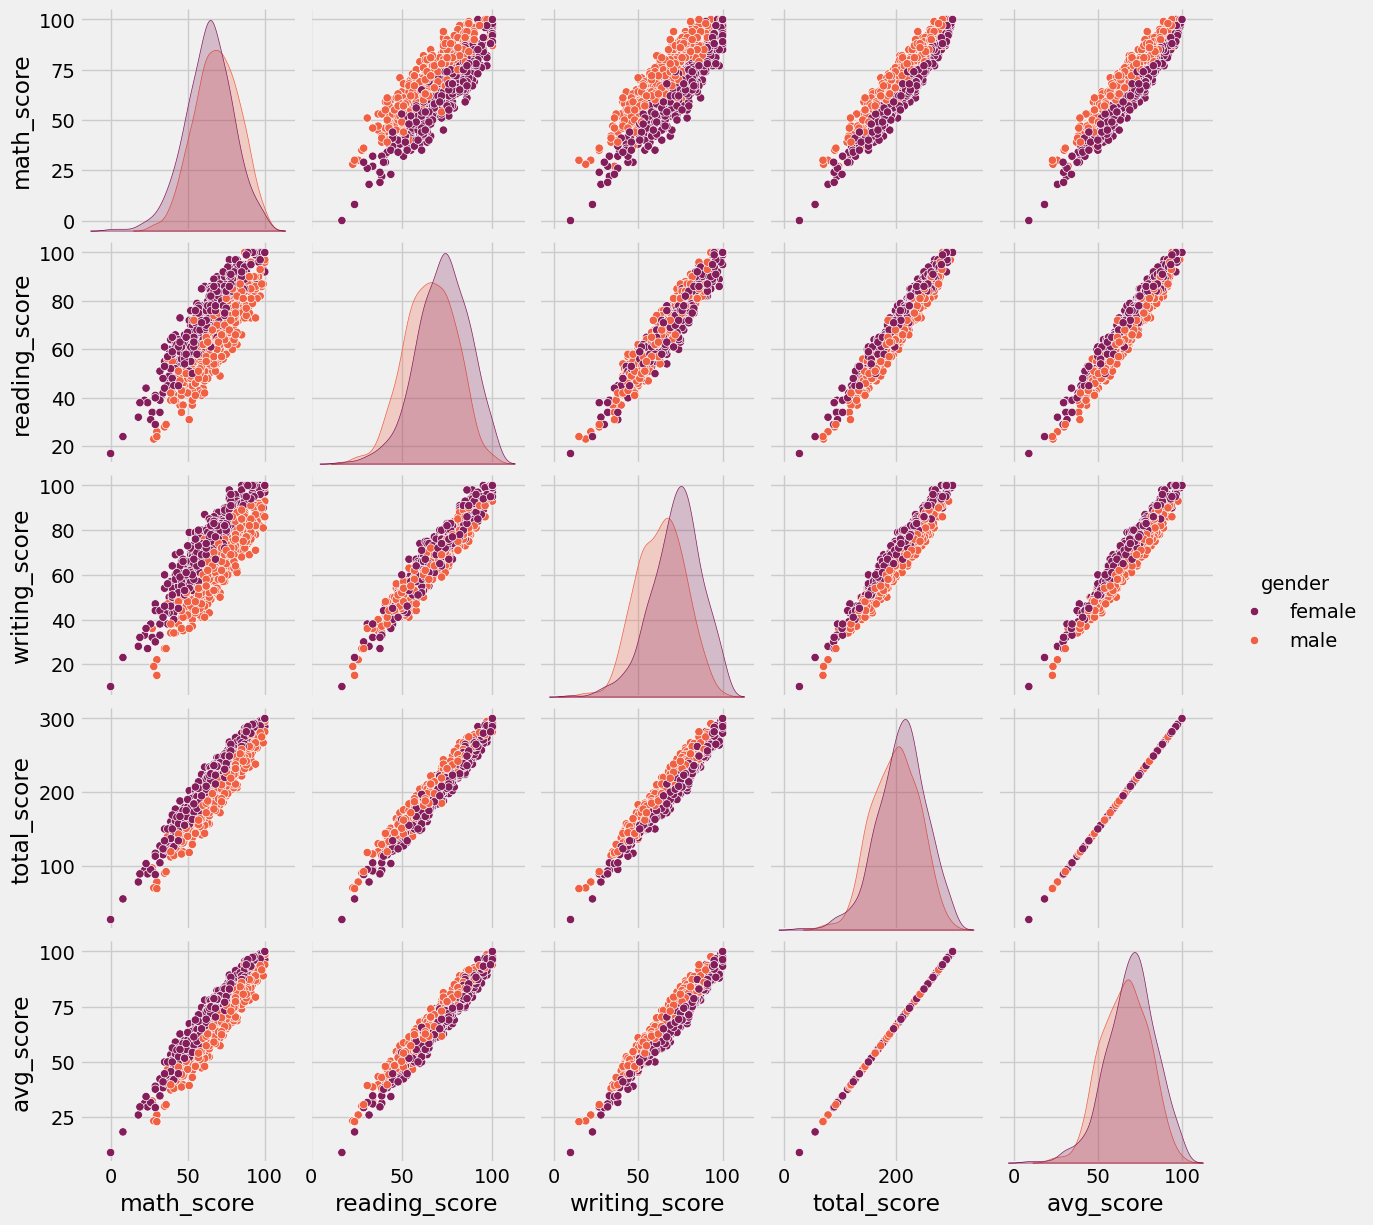

In [40]:
sns.pairplot(df, hue='gender', palette='rocket')
plt.show()

**Insight:**
*   All the scores increase linearly w.r.t. each other for both male and female.

### **Conclusions**

*   Student's Performance is related with lunch, race, parental level education.
*   Females lead in pass percentage and also are top-scorers.
*   Student's Performance is not much related with test preparation course.
*   But still finishing preparation course is beneficial.